IMPORTS


In [3]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import seaborn as sns

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

ABRINDO O DATA SET

In [4]:
dados = pd.read_excel('/content/KM2_pieces_plasticpolution.xlsx')

VERIFICANDO E DESCREVENDO OS DADOS

In [5]:
# visualizar os primeiros registros
dados.head()

,Pieces_KM2,Latitude,Longitude
0,0,40.62,-70.07
1,0,39.67,-69.43
2,3597,36.45,-64.88
3,3597,35.48,-63.70
4,17989,30.97,-60.68


In [8]:
#visualizar os ultimos registros
dados.tail()

,Pieces_KM2,Latitude,Longitude
7750,0,-12.41,-140.09
7751,0,-11.53,-140.03
7752,629,-13.85,-140.48
7753,4689,-13.28,-140.21
7754,752,-17.11,-140.77


In [7]:
# estatisticas descritivas dos atributos
dados.describe()

,Pieces_KM2,Latitude,Longitude
count,7.755000e+03,7755.000000,7755.000000
mean,1.089998e+04,25.435812,-88.293541
std,1.542194e+05,10.944430,34.070399
min,0.000000e+00,-17.140000,-177.030000
25%,0.000000e+00,17.830000,-87.065000
50%,5.400000e+02,24.980000,-71.800000
75%,3.780000e+03,32.840000,-65.010000
max,1.231695e+07,57.510000,-51.320000


In [11]:
#colunas do dataset
dados.columns

Index(['Pieces_KM2', 'Latitude', 'Longitude'], dtype='object')

In [12]:
#tamanho do conjunto de dados
dados.shape

(7755, 3)

**Correlation matrix and scatter plots**


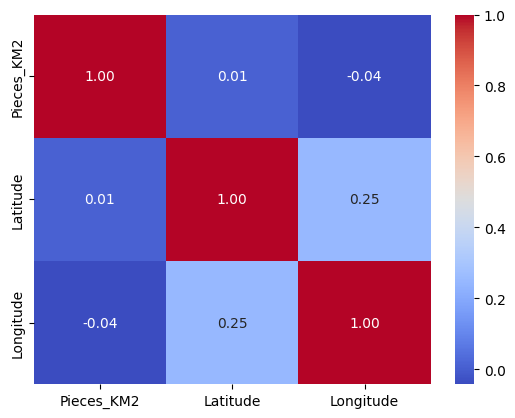

In [21]:
corr_matrix = dados[['Pieces_KM2', 'Latitude', 'Longitude']].corr().round(4)
corr_matrix
# Gerando um heatmap com seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

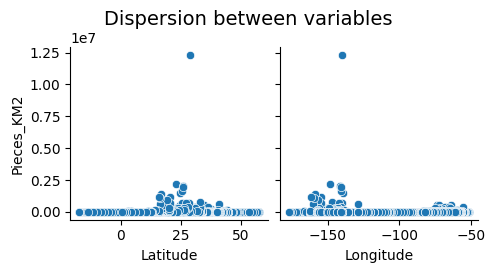

In [24]:
Bax = sns.pairplot(dados, y_vars='Pieces_KM2', x_vars=['Latitude', 'Longitude'])
Bax.fig.suptitle('Dispersion between variables', fontsize=14, y=1.05)
Bax

SEPARANDO DADOS

In [25]:
## Separação dos dados de entrada (FEATURES) e dados de saída (TARGET)
# X maiúsculo ----> features / variáveis independentes
X = dados[['Latitude', 'Longitude']]

In [26]:
# y minúsculo ----> target / variável dependente
y = dados[['Pieces_KM2']]

In [29]:
#visualizando os tres primeiros e tres ultimos dados de X
X.values

array([[  40.62,  -70.07],
       [  39.67,  -69.43],
       [  36.45,  -64.88],
       ...,
       [ -13.85, -140.48],
       [ -13.28, -140.21],
       [ -17.11, -140.77]])

In [30]:
#visualizando os tres primeiros e tres ultimos dados de y
y.values

array([[   0],
       [   0],
       [3597],
       ...,
       [ 629],
       [4689],
       [ 752]])

CREATING KNN MODEL AND LINEAR REGRESSION

In [27]:
knn_model = KNeighborsClassifier()

In [28]:
lr_model = LinearRegression()

CREATING SEPARATIONS FOR MODEL TRAINING


In [31]:
# Separação de dados de treino e teste
# X_treino, y_treino ----> para treinar o modelo com método .fit
# X_teste ----> para gerar as previsões com método .predict
# y_teste ----> para avaliar as previsões

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X.shape

(7755, 2)

In [38]:
y.shape

(7755, 1)

In [40]:
X_train.shape

(5428, 2)

In [41]:
X_test.shape

(2327, 2)

In [42]:
y_train.shape

(5428, 1)

In [43]:
y_test.shape

(2327, 1)

MODELS TRAINING

In [32]:
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LinearRegression()

TESTING THE MODELS' SUCCESS RATE

KNN

In [33]:
y_predict_knn = knn_model.predict(X_test)
y_predict_knn

array([   0,    0,    0, ...,    0,    0, 1080])

In [44]:
#Cálculo do MSE (Erro Quadrático Médio)
MSE_2 = mean_squared_error(y_test, y_predict_knn)
#Cálculo do RMSE (Raiz do Erro Quadrático Médio)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_knn))
#Cálculo do R² (Coeficiente de Determinação)
R2_2 = r2_score(y_test, y_predict_knn)

#Criação de um DataFrame com as métricas
pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['KNN'])

,KNN
MSE,3.166050e+09
RMSE,5.626766e+04
R²,-1.659481e-02


LINEAR REGRESSION

In [35]:
y_predict_lr = lr_model.predict(X_test)
y_predict_lr

array([[26848.11525973],
       [ 9998.42556184],
       [26865.91001572],
       ...,
       [33356.20411153],
       [  587.49643964],
       [ 7921.71720958]])

In [45]:
MSE_2 = mean_squared_error(y_test, y_predict_lr)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_lr))
R2_2 = r2_score(y_test, y_predict_lr)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['LINEAR REGRESSION'])

,LINEAR REGRESSION
MSE,3.151628e+09
RMSE,5.613936e+04
R²,-1.196406e-02


SET CODE FOR INCREASED USER EXECUTION SPEED


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

y_predict_knn = knn_model.predict(X_test)
y_predict_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [48]:
MSE_2 = mean_squared_error(y_test, y_predict_knn)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_knn))
R2_2 = r2_score(y_test, y_predict_knn)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['KNN'])

,KNN
MSE,2.515599e+09
RMSE,5.015575e+04
R²,-2.214881e-02


In [49]:
MSE_2 = mean_squared_error(y_test, y_predict_lr)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_predict_lr))
R2_2 = r2_score(y_test, y_predict_lr)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['LINEAR REGRESSION'])

,LINEAR REGRESSION
MSE,2.483028e+09
RMSE,4.982999e+04
R²,-8.914394e-03
